In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("heart.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
data.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
enc = LabelEncoder()


In [8]:
data['Sex'] = enc.fit_transform(data['Sex'])
data['ChestPainType'] = enc.fit_transform(data['ChestPainType'])
data['RestingECG'] = enc.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = enc.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = enc.fit_transform(data['ST_Slope'])
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
randModel = RandomForestClassifier(n_estimators=5)

In [81]:
x = data.drop(['HeartDisease','Age'],axis=1)
y = data['HeartDisease']

In [82]:
x

,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,1,1,140,289,0,1,172,0,0.0,2
1,0,2,160,180,0,1,156,0,1.0,1
2,1,1,130,283,0,2,98,0,0.0,2
3,0,0,138,214,0,1,108,1,1.5,1
4,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...
913,1,3,110,264,0,1,132,0,1.2,1
914,1,0,144,193,1,1,141,0,3.4,1
915,1,0,130,131,0,1,115,1,1.2,1
916,0,1,130,236,0,0,174,0,0.0,1


In [14]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [84]:
randModel.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [45]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [85]:
y_pred = randModel.predict(x_test)

In [86]:
accuracy_score(y_test,y_pred)

0.8913043478260869

In [42]:
from sklearn.model_selection import GridSearchCV

In [89]:
para = {
    'n_estimators':[5,10,20,50],
    'criterion':['gini','log_loss','entropy']
}
gcv = GridSearchCV(RandomForestClassifier(),para)

In [90]:
gcv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'log_loss', 'entropy'],
                         'n_estimators': [5, 10, 20, 50]})

In [91]:
gcv.best_params_

{'criterion': 'log_loss', 'n_estimators': 50}

In [92]:
randModel = RandomForestClassifier(n_estimators=50,criterion='log_loss')

In [93]:
randModel.fit(x_train,y_train)
y_pred = randModel.predict(x_test)
accuracy_score(y_test,y_pred)

0.9021739130434783

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        87
           1       0.88      0.95      0.91        97

    accuracy                           0.90       184
   macro avg       0.91      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



<AxesSubplot:>

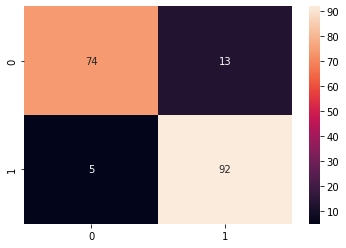

In [94]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logiModel = LogisticRegression()

In [95]:
logiModel.fit(x_train,y_train)

d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
logi_y_pred = logiModel.predict(x_test)

In [97]:
accuracy_score(y_test,logi_y_pred)

0.8532608695652174

In [99]:
print(classification_report(y_test,logi_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        87
           1       0.85      0.88      0.86        97

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



<AxesSubplot:>

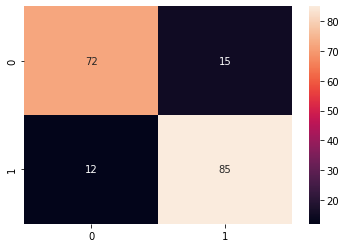

In [100]:
sns.heatmap(confusion_matrix(y_test,logi_y_pred),annot=True)

In [102]:
paraLogi = {
    'penalty':['none','l1','l2','elasticnet'],
    'C':[1,0.1,10,0.001],
    'solver':['newton-cg','lbfgs','liblinear','sag','saga']
}

gcvLogi = GridSearchCV(LogisticRegression(),paraLogi)

In [103]:
gcvLogi.fit(x_train,y_train)

d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 0.1, 10, 0.001],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [104]:
gcvLogi.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [105]:
logiModel = LogisticRegression(penalty='l2',C=1,solver='newton-cg')

In [106]:
logiModel.fit(x_train,y_train)

LogisticRegression(C=1, solver='newton-cg')

In [107]:
logi_y_pred = logiModel.predict(x_test)

In [108]:
accuracy_score(y_test,logi_y_pred)

0.8532608695652174

<AxesSubplot:>

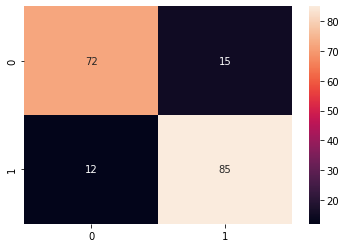

In [109]:
sns.heatmap(confusion_matrix(y_test,logi_y_pred),annot=True)

In [111]:
print(classification_report(y_test,logi_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        87
           1       0.85      0.88      0.86        97

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

